In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from evaluacion_funciones import *

In [2]:
# Carga de datos.
datos = datasets.load_boston()

In [3]:
# Construcción de los algoritmos de aprendizaje.
k = 10
base = 'KNN' + str(k)
algoritmos = {}

In [4]:
# Algoritmo 1: KNN
algoritmos[base] = KNeighborsRegressor(n_neighbors = k)

In [14]:
algoritmos

{'KNN10': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
 'Est+KNN10': Pipeline(memory=None,
          steps=[('estandarizacion',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('reg',
                  KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
          verbose=False),
 'Est+SelAtr+KNN10': Pipeline(memory=None,
          steps=[('estandarizacion',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('selatr',
                  SelectPercentile(percentile=10,
                                   score_func=<function f_regression at 0x7f9ed023d170

In [8]:
# Algoritmo 2: Estandarización + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('reg', algoritmos[base])]
algoritmos['Est+'+base] = Pipeline(pasos)

In [13]:
# Algoritmo 3: Estandarización + Selección atributos + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression,
           percentile=10)),
         ('reg', algoritmos[base])]
algoritmos['Est+SelAtr+'+base] = Pipeline(pasos)

In [15]:
# Algoritmo 4: Estandarización + Selecc. atributos + KNN(p=1)
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression,
           percentile=10)),
         ('reg', KNeighborsRegressor(n_neighbors = k, p=1))]
algoritmos['Est+SelAtr+'+base+'(p=1)'] = Pipeline(pasos)

In [16]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [17]:
algoritmos

{'KNN10': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
 'Est+KNN10': Pipeline(memory=None,
          steps=[('estandarizacion',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('reg',
                  KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=10, p=2,
                                      weights='uniform'))],
          verbose=False),
 'Est+SelAtr+KNN10': Pipeline(memory=None,
          steps=[('estandarizacion',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('selatr',
                  SelectPercentile(percentile=10,
                                   score_func=<function f_regression at 0x7f9ed023d170

In [18]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, datos.data,
       datos.target, cv=KFold(n_splits=10, random_state=seed, shuffle=True))

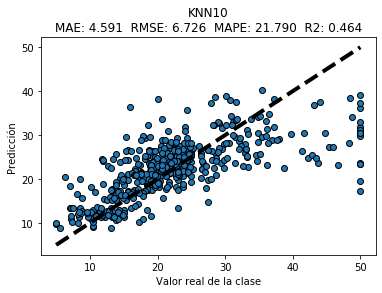

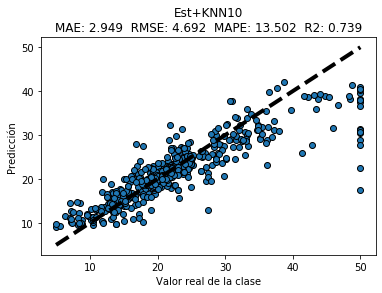

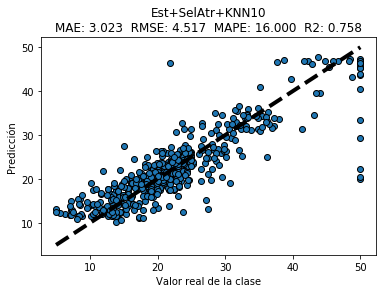

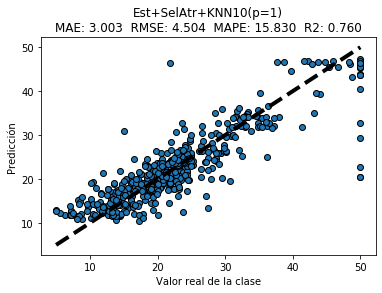

In [20]:
# Evaluación y presentación de resultados.
for nombre, alg in algoritmos.items():
    eval = evaluacion(datos.target, y_pred[nombre], metricas)
    grafica_real_vs_pred(datos.target, y_pred[nombre], eval, nombre)